In [1]:
import numpy as np
import pandas as pd

In [2]:
df_test = pd.read_csv('../data/drug_sensitivity_CellBlind_test.csv', index_col=0)
print(df_test.shape)
df_test.head()

(12609, 3)


,drug,cell_line,IC50
0,5-Fluorouracil,PC14,4.138791
1,5-azacytidine,PC14,2.782368
2,A-366,PC14,4.651003
3,ABT737,PC14,2.341568
4,AGI-5198,PC14,5.232588


In [4]:
data = np.load('result/mse_preds.npy')
print(data.shape)

(2, 12480)


In [5]:
pre = data[0]
y = data[1]

In [6]:
mse = np.mean((pre - y)**2)
print(mse)

1.9086291


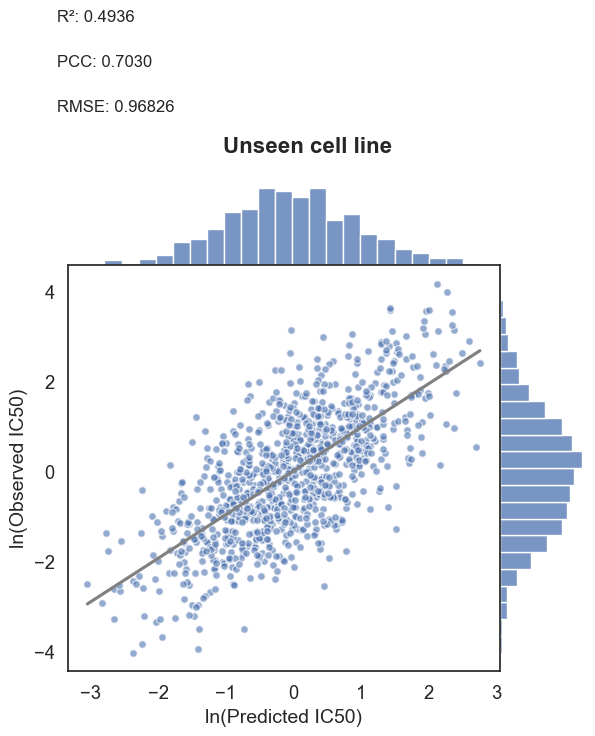

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

# Generating random data for demonstration purposes
# In a real-world scenario, this data would come from experimental results or observations.
np.random.seed(0)
predicted = np.random.normal(loc=0.0, scale=1.0, size=1000)
observed = predicted + np.random.normal(loc=0.0, scale=1.0, size=1000)

# Calculate the statistics
rmse = np.sqrt(mean_squared_error(observed, predicted))
pcc, _ = pearsonr(observed, predicted)
r2 = r2_score(observed, predicted)

# Create the main scatter plot
sns.set(style="white", font_scale=1.2)
g = sns.JointGrid(x=predicted, y=observed, space=0)
g = g.plot_joint(plt.scatter, color="b", edgecolor="white", s=30, alpha=0.6)

# Fit the linear regression line
sns.regplot(x=predicted, y=observed, scatter=False, ax=g.ax_joint, color='grey', ci=None)

# Create histograms
g = g.plot_marginals(sns.histplot, color="b", edgecolor="white", kde=False)

# Annotate the plot with the statistics
plt.text(-3.5, 8, f'RMSE: {rmse:.5f}', fontsize=12)
plt.text(-3.5, 9, f'PCC: {pcc:.4f}', fontsize=12)
plt.text(-3.5, 10, f'R\u00b2: {r2:.4f}', fontsize=12)

# Labels and titles
g.set_axis_labels('ln(Predicted IC50)', 'ln(Observed IC50)', fontsize=14)
g.fig.suptitle('Unseen cell line', fontsize=16, fontweight='bold')

# Adjust the figure to prevent clipping of the title
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()
